In [117]:
import torch
from torchvision import datasets, transforms
from torchvision import datasets, transforms
from torch.utils.data import ConcatDataset, DataLoader
device = "cuda" if torch.cuda.is_available() else "cpu"

In [118]:
# data_dir = '/kaggle/input/leukemia-classification/C-NMC_Leukemia'

data_dir1 = '/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0'
data_dir2 = '/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_1'
data_dir3 = '/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_2'

# Створіть екземпляр ImageFolder
dataset = datasets.ImageFolder(root=data_dir)

In [119]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Пример размера
    transforms.ToTensor(),
])

In [120]:
dataset1 = datasets.ImageFolder(root=data_dir1)
dataset2 = datasets.ImageFolder(root=data_dir2)
dataset3 = datasets.ImageFolder(root=data_dir3)

In [121]:
dataset1.classes

['all', 'hem']

In [122]:
combined_dataset = ConcatDataset([dataset1, dataset2, dataset3])

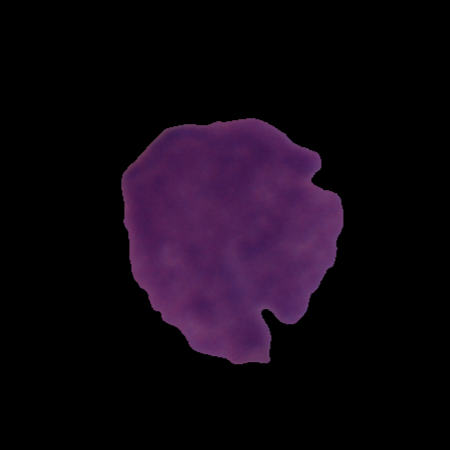

In [123]:
image_tensor, label = combined_dataset[0]
image_tensor

In [124]:
from torch.utils.data import random_split

train_ratio = 0.8

# Розділіть набір даних
train_data, val_data = random_split(combined_dataset, [train_ratio, 1-train_ratio])

In [125]:
train_transform = transforms.Compose([
    transforms.Resize((256, 256)), # Зміна розміру зображення до 256x256 пікселів
    transforms.RandomHorizontalFlip(p=0.5), # Випадково перевернути по горизонталі з ймовірністю 50%
    transforms.CenterCrop((200, 200)),
    transforms.ToTensor(), # Перетворити зображення у тензори PyTorch
])

test_transform = transforms.Compose([
    transforms.Resize((256, 256)), # Зміна розміру зображення до 256x256 пікселів
    transforms.ToTensor(), # Перетворити зображення у тензори PyTorch
])


class TransformDataset(torch.utils.data.Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
        
    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y
        
    def __len__(self):
        return len(self.subset)

    
train_data = TransformDataset(train_data, transform = train_transform)
val_data = TransformDataset(val_data, transform = test_transform)

In [126]:
len(train_data), len(val_data)

(8529, 2132)

In [127]:
batch_size = 32

# Створіть завантажувачі даних
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = torch.utils.data.DataLoader(val_data, shuffle=True, batch_size=batch_size)

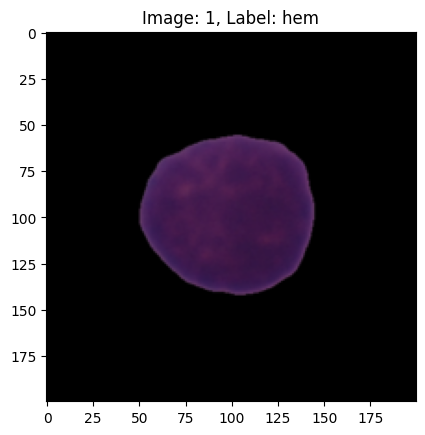

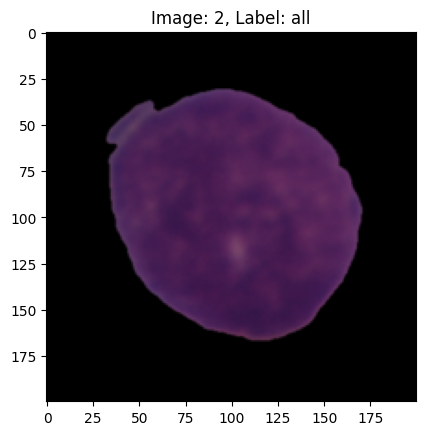

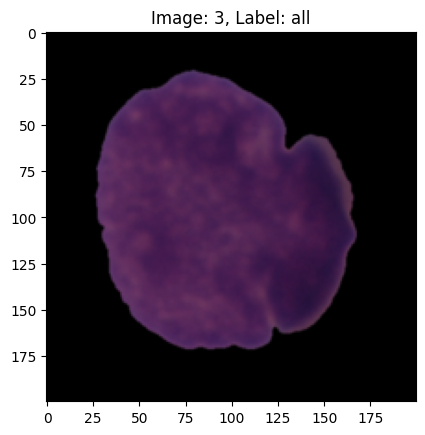

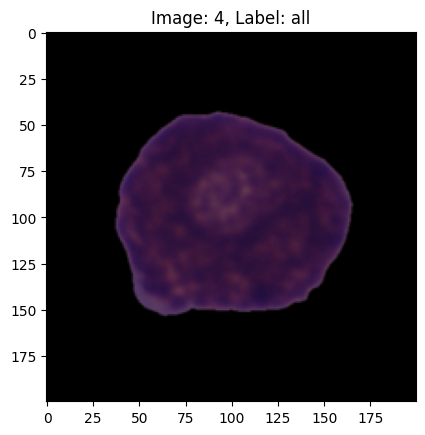

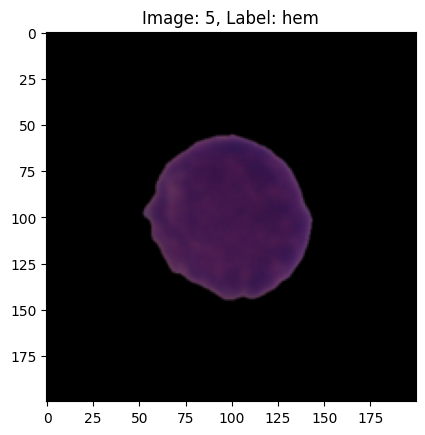

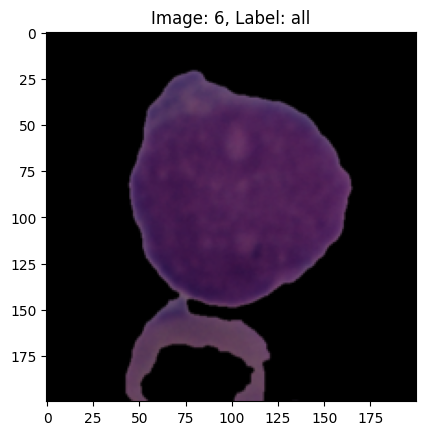

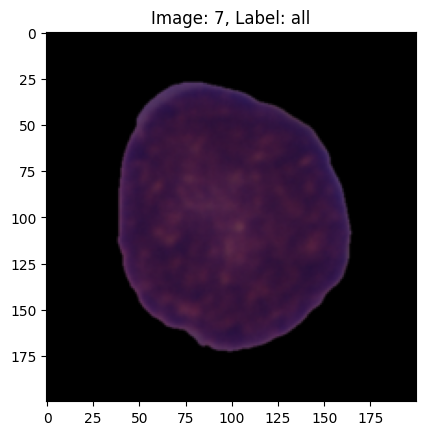

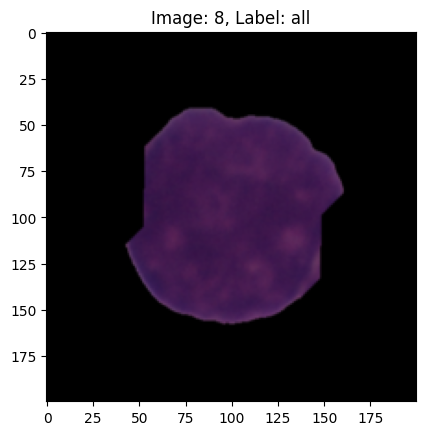

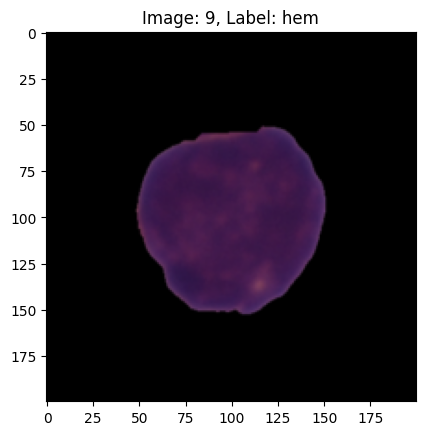

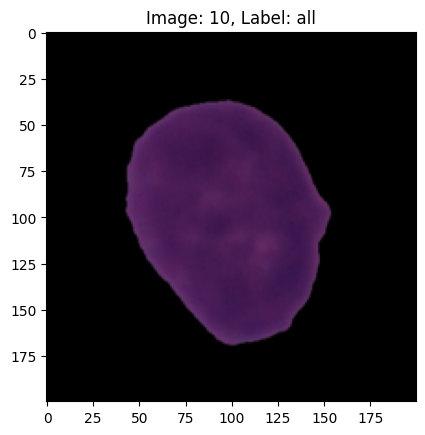

In [128]:
import matplotlib.pyplot as plt

for i in range(10):  # Show 3 images
    img, label = train_data[i]

    # Get the image data (tensor) and convert it back to a NumPy array for manipulation
    img = img.numpy()

    # Convert the color channels from (channels, height, width) to (height, width, channels) for pyplot
    img = img.transpose((1, 2, 0))

    # Get the label name from the dataset class labels
    label_name = dataset2.classes[label]

    # Plot the image with a title (including label name)
    plt.imshow(img)
    plt.title(f"Image: {i+1}, Label: {label_name}")
    plt.show()

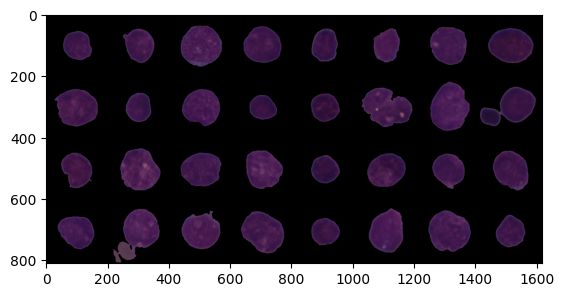

In [129]:
from torchvision.utils import make_grid

loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=32)

  
batch, labels = next(iter(loader))

grid = make_grid(batch).permute(1, 2, 0) # результатом є тензор

plt.imshow(grid)